#### Import Libraries

In [169]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Q1.
##### Load the data

In [170]:
# Load the data
df = pd.read_csv('C:/Users/bb/Desktop/ADS-Assignment-9/heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


### Q2.
###### Explore the data. Notice all columns are numerical. Therefore separate the continuous from the discrete features.

##### Explore the data

In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [172]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [173]:
df.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

####  Separate the continuous from the discrete features.


In [174]:
discrete = []
continuous = []
for column in df.columns:
    if df[column].nunique() >= 10:
        continuous.append(column)
    else:
        discrete.append(column)
print('Discrete:', discrete)
print('Continuous:', continuous)

Discrete: ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']
Continuous: ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']


### Q3.
###### Identify any presence of outliers in the continuous features and resolve them using the IQR method.

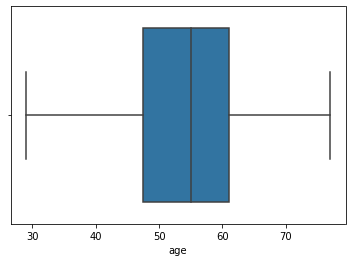

<Figure size 576x432 with 0 Axes>

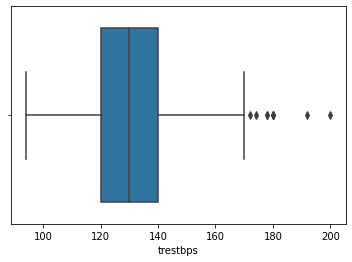

<Figure size 576x432 with 0 Axes>

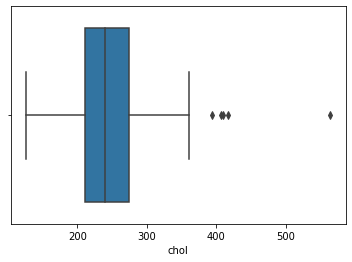

<Figure size 576x432 with 0 Axes>

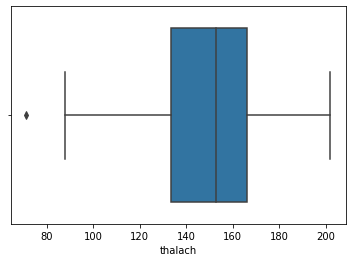

<Figure size 576x432 with 0 Axes>

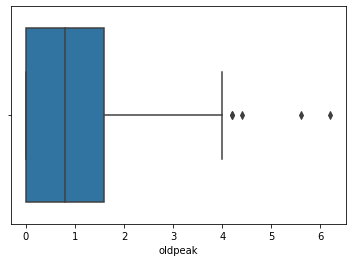

<Figure size 576x432 with 0 Axes>

In [175]:
for column in continuous:
    sns.boxplot(data=df, x=column)
    plt.figure(figsize=(8, 6))
    plt.show()

#### Outliers identified in trestbps, chol, thalach, oldpeak

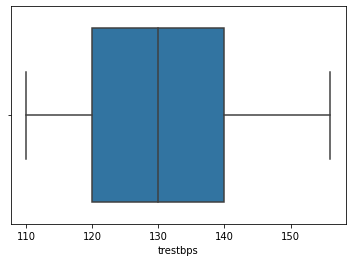

<Figure size 576x432 with 0 Axes>

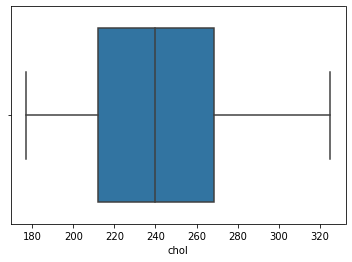

<Figure size 576x432 with 0 Axes>

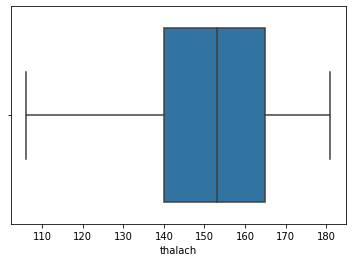

<Figure size 576x432 with 0 Axes>

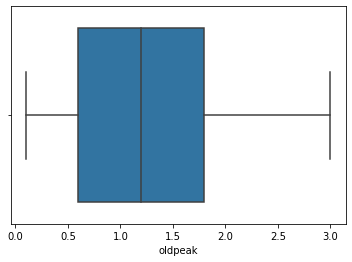

<Figure size 576x432 with 0 Axes>

In [176]:
outlier_columns = list(['trestbps', 'chol', 'thalach', 'oldpeak'])
for item in outlier_columns:
    upper_lim = df[item].quantile(.95)
    lower_lim = df[item].quantile(.05)
    df = df[(df[item] < upper_lim) & (df[item] > lower_lim)]
    sns.boxplot(data=df, x=item)
    plt.figure(figsize=(8, 6))
    plt.show()

### Q4.
###### Binned the continuous column values apart from the column ‘oldpeak’.

In [177]:
binning_data = df[['age', 'trestbps', 'chol', 'thalach']]
sorted(binning_data.age.unique())

[35,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 74,
 76]

In [178]:
df['age'] = pd.qcut(df.age, q=[0, .25, .50, .75, 1])
df['trestbps'] = pd.qcut(df.trestbps, q=[0, .25, .50, .75, 1])
df['chol'] = pd.qcut(df.chol, q=[0, .25, .50, .75, 1])
df['thalach'] = pd.qcut(df.thalach, q=[0, .25, .50, .75, 1])
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,"(61.0, 76.0]",1,3,"(140.0, 155.0]","(213.0, 241.0]",1,0,"(147.0, 162.0]",0,2.3,0,0,1,1
2,"(34.999, 50.0]",0,1,"(120.0, 130.0]","(176.999, 213.0]",0,0,"(162.0, 181.0]",0,1.4,2,0,2,1
3,"(50.0, 56.0]",1,1,"(109.999, 120.0]","(213.0, 241.0]",0,1,"(162.0, 181.0]",0,0.8,2,0,2,1
5,"(56.0, 61.0]",1,0,"(130.0, 140.0]","(176.999, 213.0]",0,1,"(147.0, 162.0]",0,0.4,1,0,1,1
6,"(50.0, 56.0]",0,1,"(130.0, 140.0]","(269.0, 325.0]",0,0,"(147.0, 162.0]",0,1.3,1,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286,"(56.0, 61.0]",1,3,"(130.0, 140.0]","(176.999, 213.0]",0,1,"(147.0, 162.0]",0,0.8,2,2,2,0
289,"(50.0, 56.0]",0,0,"(120.0, 130.0]","(176.999, 213.0]",0,2,"(105.999, 132.0]",1,2.0,1,1,3,0
293,"(61.0, 76.0]",1,2,"(140.0, 155.0]","(176.999, 213.0]",0,0,"(147.0, 162.0]",0,0.8,1,0,3,0
298,"(56.0, 61.0]",0,0,"(130.0, 140.0]","(213.0, 241.0]",0,1,"(105.999, 132.0]",1,0.2,1,0,3,0


In [179]:
# Label Encode the bins
from sklearn.preprocessing import LabelEncoder, LabelBinarizer
le = LabelEncoder()

df['age'] = le.fit_transform(df['age'])
df['trestbps'] = le.fit_transform(df['trestbps'])
df['chol'] = le.fit_transform(df['chol'])
df['thalach'] = le.fit_transform(df['thalach'])

df


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,3,1,3,3,1,1,0,2,0,2.3,0,0,1,1
2,0,0,1,1,0,0,0,3,0,1.4,2,0,2,1
3,1,1,1,0,1,0,1,3,0,0.8,2,0,2,1
5,2,1,0,2,0,0,1,2,0,0.4,1,0,1,1
6,1,0,1,2,3,0,0,2,0,1.3,1,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286,2,1,3,2,0,0,1,2,0,0.8,2,2,2,0
289,1,0,0,1,0,0,2,0,1,2.0,1,1,3,0
293,3,1,2,3,0,0,0,2,0,0.8,1,0,3,0
298,2,0,0,2,1,0,1,0,1,0.2,1,0,3,0


### Q5.
###### Separate the features from the labels and use the most appropriate feature selection technique(s).

In [180]:
# Target and Feature variables
y = df['target']
x = df.drop(['target'], axis=1)

In [181]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125 entries, 0 to 299
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       125 non-null    int32  
 1   sex       125 non-null    int64  
 2   cp        125 non-null    int64  
 3   trestbps  125 non-null    int32  
 4   chol      125 non-null    int32  
 5   fbs       125 non-null    int64  
 6   restecg   125 non-null    int64  
 7   thalach   125 non-null    int32  
 8   exang     125 non-null    int64  
 9   oldpeak   125 non-null    float64
 10  slope     125 non-null    int64  
 11  ca        125 non-null    int64  
 12  thal      125 non-null    int64  
dtypes: float64(1), int32(4), int64(8)
memory usage: 11.7 KB


In [182]:
y.info()

<class 'pandas.core.series.Series'>
Int64Index: 125 entries, 0 to 299
Series name: target
Non-Null Count  Dtype
--------------  -----
125 non-null    int64
dtypes: int64(1)
memory usage: 2.0 KB


In [183]:
# Feature Selection
import statsmodels.api as sm

X1 = sm.add_constant(x)
model = sm.OLS(y, X1).fit()
model.pvalues

const       0.000001
age         0.631834
sex         0.004263
cp          0.000347
trestbps    0.492843
chol        0.476289
fbs         0.335156
restecg     0.662308
thalach     0.285858
exang       0.053753
oldpeak     0.111808
slope       0.192917
ca          0.026908
thal        0.005222
dtype: float64

In [184]:
# We build the model again without 
#Backward Elimination
X1 = x
Y1 = y
cols = list(X1.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X1[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(Y1,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

['sex', 'cp', 'exang', 'oldpeak', 'ca', 'thal']


In [185]:
x = x[['sex', 'cp', 'exang', 'oldpeak', 'ca', 'thal']]
x.reset_index(inplace=True, drop=True)
x

,sex,cp,exang,oldpeak,ca,thal
0,1,3,0,2.3,0,1
1,0,1,0,1.4,0,2
2,1,1,0,0.8,0,2
3,1,0,0,0.4,0,1
4,0,1,0,1.3,0,2
...,...,...,...,...,...,...
120,1,3,0,0.8,2,2
121,0,0,1,2.0,1,3
122,1,2,0,0.8,0,3
123,0,0,1,0.2,0,3


### Q3.
###### Slice the data and scale the features.

In [186]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [187]:
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

x_train = pd.DataFrame(MinMaxScaler().fit_transform(x_train), columns=x_train.columns)
x_train.head()

,sex,cp,exang,oldpeak,ca,thal
0,1.0,0.000000,1.0,0.310345,0.00,0.000000
1,1.0,0.000000,0.0,0.862069,0.00,1.000000
2,0.0,0.666667,0.0,0.517241,0.00,0.666667
3,0.0,1.000000,0.0,0.275862,0.00,0.666667
4,1.0,0.666667,0.0,0.586207,0.75,1.000000


In [188]:
x_test = pd.DataFrame(MinMaxScaler().fit_transform(x_test), columns=x_test.columns)
x_test.head()

,sex,cp,exang,oldpeak,ca,thal
0,1.0,0.000000,1.0,0.448276,0.25,1.0
1,0.0,0.000000,1.0,0.034483,0.00,0.5
2,1.0,0.666667,0.0,0.655172,0.00,0.5
3,1.0,0.000000,0.0,0.103448,0.00,0.5
4,1.0,0.333333,0.0,0.310345,0.00,1.0


In [189]:
# Target Encode
from category_encoders import TargetEncoder

te = TargetEncoder()

def target_encoder(col, target):
    for i in range(len(x_train.columns)):
        col.iloc[:,i] = te.fit_transform(col, target)
    return col

df_te_train = target_encoder(x_train, y_train)
df_te_train.head()

ValueError: `X` and `y` both have indexes, but they do not match.

### Q7.
###### Identify the data if the data is balanced. If not, sample the data using the most appropriate method keeping the size of the data in mind.

In [ ]:
# Checking if the data is balanced
target_0 = df[df.target == 0].target.count() / df.target.count()
target_1 = df[df.target == 1].target.count() / df.target.count()

print(target_0)
print(target_1)

0.504
0.496


In [ ]:
# Oversampling (SMOTE: Synthetic Minority Oversampling Technique)

from imblearn.over_sampling import SMOTE
from collections import Counter

oversample = SMOTE(random_state=42)

x_train, y_train = oversample.fit_resample(x_train, y_train)
print(Counter(y_train))

AttributeError: module 'scipy.sparse' has no attribute 'linalg'